# Import kaggle dataset
If you do not lnow how to import a dataset from kaggle follow the link below here :<br>https://www.kaggle.com/discussions/general/74235 <br>
You can also my codes in kaggle :<br> https://www.kaggle.com/code/matinmobayen/vegetables-imageclasssification-resnet50

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"matinmobayen","key":"3d1ecfd64aac41e7633b1bf4b796977e"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

## I downloaded dataset here

In [ ]:
! kaggle datasets download -d misrakahmed/vegetable-image-dataset

100% 533M/534M [00:24<00:00, 24.2MB/s]
100% 534M/534M [00:24<00:00, 22.6MB/s]


### lets unzip the zip file

In [ ]:
! unzip vegetable-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Vegetable Images/train/Radish/0001.jpg  
  inflating: Vegetable Images/train/Radish/0002.jpg  
  inflating: Vegetable Images/train/Radish/0003.jpg  
  inflating: Vegetable Images/train/Radish/0004.jpg  
  inflating: Vegetable Images/train/Radish/0005.jpg  
  inflating: Vegetable Images/train/Radish/0006.jpg  
  inflating: Vegetable Images/train/Radish/0007.jpg  
  inflating: Vegetable Images/train/Radish/0008.jpg  
  inflating: Vegetable Images/train/Radish/0009.jpg  
  inflating: Vegetable Images/train/Radish/0010.jpg  
  inflating: Vegetable Images/train/Radish/0011.jpg  
  inflating: Vegetable Images/train/Radish/0012.jpg  
  inflating: Vegetable Images/train/Radish/0013.jpg  
  inflating: Vegetable Images/train/Radish/0014.jpg  
  inflating: Vegetable Images/train/Radish/0015.jpg  
  inflating: Vegetable Images/train/Radish/0016.jpg  
  inflating: Vegetable Images/train/Radish/0017.jpg  
  inflating: Vegetable Images/t

## lets import necessary libraries here

In [ ]:
import os
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import numpy as np

## Take a look at a picture un dataset here and realize the shape of pictures
(Beacuse we have to set the image shape in our model)

test  train  validation


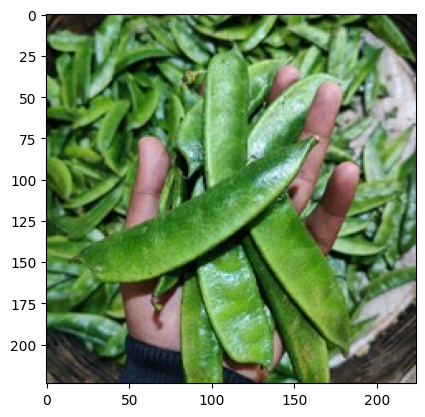

(224, 224, 3)


In [ ]:
pic = r"Vegetable Images/test/Bean/0001.jpg"
image = mpimg.imread(pic)
plt.imshow(image)
plt.show()
imagse=np.array(image)
! ls "Vegetable Images/"
print(imagse.shape)

## Lets get ready with train test valid

In [ ]:
train_path = "Vegetable Images/train"
test_path = "Vegetable Images/test"
valid_path = "Vegetable Images/validation"
# image generator , flow from directory
# you can use image generator then using flow from directory instead of what I did
import tensorflow as tf
train_data = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
)
test_data = tf.keras.utils.image_dataset_from_directory(
    test_path,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
)
valid_data = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
)

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


# Lets create model
## I used ResNet50

In [ ]:
model = keras.applications.ResNet50(
    include_top = True,
    weights=None,
    input_shape=(224, 224, 3),
    pooling=max,
    classes = 15,
    classifier_activation="softmax",
)
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"],
)
# model.summary()
history = model.fit(
    x = train_data,
    y = None,
    batch_size=128,
    epochs=10,
    validation_split=0.0,
    validation_data=valid_data,
    shuffle=False
    )

Epoch 1/10
469/469 [==============================] - 184s 336ms/step - loss: 1.4678 - accuracy: 0.5609 - val_loss: 1.6822 - val_accuracy: 0.5687
Epoch 2/10
469/469 [==============================] - 158s 336ms/step - loss: 0.4244 - accuracy: 0.8662 - val_loss: 0.6602 - val_accuracy: 0.8103
Epoch 3/10
469/469 [==============================] - 159s 338ms/step - loss: 0.2229 - accuracy: 0.9315 - val_loss: 0.5368 - val_accuracy: 0.8460
Epoch 4/10
469/469 [==============================] - 159s 338ms/step - loss: 0.1337 - accuracy: 0.9590 - val_loss: 0.2132 - val_accuracy: 0.9337
Epoch 5/10
469/469 [==============================] - 159s 338ms/step - loss: 0.1031 - accuracy: 0.9679 - val_loss: 0.4207 - val_accuracy: 0.8850
Epoch 6/10
469/469 [==============================] - 159s 339ms/step - loss: 0.0767 - accuracy: 0.9779 - val_loss: 0.0999 - val_accuracy: 0.9710
Epoch 7/10
469/469 [==============================] - 159s 339ms/step - loss: 0.0561 - accuracy: 0.9824 - val_loss: 0.3569 -

## Lets visualize train and validation against epochs

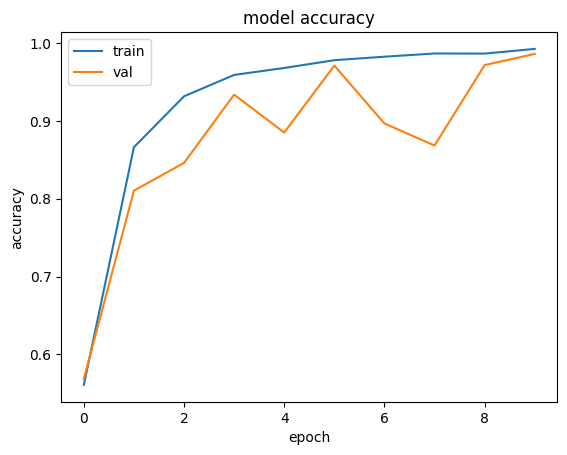

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Lets evaluate on test dataset

In [ ]:
model.evaluate(test_data)

94/94 [==============================] - 10s 101ms/step - loss: 0.0485 - accuracy: 0.9870


[0.04851241409778595, 0.9869999885559082]